<a href="https://colab.research.google.com/github/Jhanavi-24/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

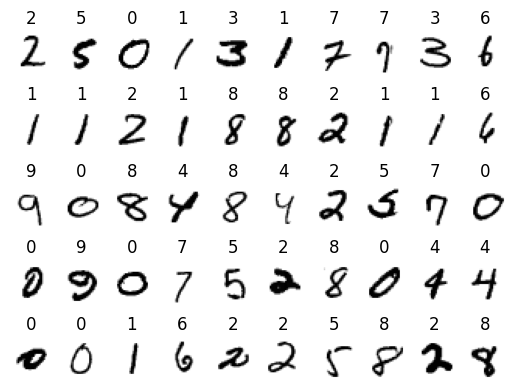

In [ ]:
import cv2
import matplotlib.pyplot as plt
for i in range(1,51):
  rn_no = np.random.randint(0,len(x_train))
  plt.subplot(5,10,i).set_title(f'{y_train[rn_no]}')
  plt.axis(False)
  plt.imshow(x_train[rn_no],cmap= 'gray_r')

In [ ]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

input_shape = (img_rows , img_cols , 1)

x_train /= 255
x_test /= 255

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten , Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , input_shape = input_shape))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(num_classes , activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
batch_size = 128
epochs = 15

history = model.fit(x_train,y_train, batch_size=batch_size, epochs = epochs, validation_data= (x_test,y_test))

Epoch 1/15
469/469 [==============================] - 5s 8ms/step - loss: 2.2126 - accuracy: 0.3716 - val_loss: 2.0848 - val_accuracy: 0.5950
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 1.6963 - accuracy: 0.6884 - val_loss: 1.0948 - val_accuracy: 0.8019
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.7480 - accuracy: 0.8299 - val_loss: 0.5182 - val_accuracy: 0.8692
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4735 - accuracy: 0.8722 - val_loss: 0.3989 - val_accuracy: 0.8927
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3948 - accuracy: 0.8902 - val_loss: 0.3515 - val_accuracy: 0.9028
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3557 - accuracy: 0.8995 - val_loss: 0.3231 - val_accuracy: 0.9093
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3311 - accuracy: 0.9057 - val_loss: 0.3023 - val_accuracy: 0.9145
Epoch 

In [ ]:
score = model.evaluate(x_test,y_test)
print('test loss', score[0])
print('test accuracy', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2261 - accuracy: 0.9358
test loss 0.22613036632537842
test accuracy 0.9358000159263611


In [ ]:
pred = np.argmax(model.predict(x_test), axis=-1)
print(pred)

313/313 [==============================] - 2s 5ms/step
[7 2 1 ... 4 5 6]


In [ ]:
y_test = np.argmax(y_test,axis=-1)
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)
print(misclassified_indices)
print()
print(len(misclassified_indices[0]))

(array([   8,   33,   62,   77,   92,  124,  149,  195,  217,  233,  241,
        247,  259,  290,  300,  313,  318,  320,  321,  325,  340,  341,
        352,  362,  412,  444,  445,  448,  449,  478,  479,  502,  507,
        511,  515,  531,  543,  551,  565,  569,  578,  582,  591,  610,
        613,  619,  628,  629,  658,  659,  684,  689,  691,  707,  717,
        720,  740,  760,  791,  839,  844,  890,  898,  924,  938,  939,
        944,  947,  950,  951,  965,  975,  990,  999, 1014, 1032, 1039,
       1044, 1062, 1082, 1101, 1107, 1112, 1114, 1119, 1173, 1181, 1182,
       1191, 1192, 1194, 1198, 1202, 1204, 1206, 1226, 1232, 1234, 1242,
       1247, 1248, 1253, 1260, 1270, 1283, 1289, 1299, 1310, 1315, 1319,
       1326, 1328, 1337, 1378, 1393, 1433, 1440, 1444, 1453, 1463, 1467,
       1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1581, 1587, 1609,
       1621, 1634, 1640, 1671, 1681, 1695, 1709, 1717, 1718, 1722, 1727,
       1751, 1754, 1765, 1772, 1790, 1800, 1813, 1

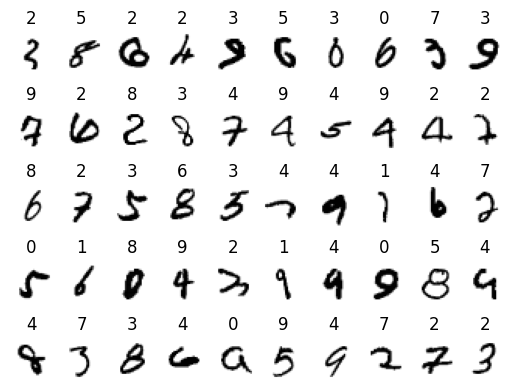

In [ ]:
import random
for i in range(1,51):
  rn_no = random.choice(misclassified_indices[0])
  plt.subplot(5,10,i).set_title(f'{pred[rn_no]}')
  plt.axis(False)
  plt.imshow(x_test[rn_no],cmap= 'gray_r')